In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import warnings

from IPython.core.display import display, HTML
from sklearn.preprocessing import MinMaxScaler
    
# import plotly 
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls

# for color scales in plotly
import colorlover as cl 

# configure things
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.2f}'.format  
pd.options.display.max_columns = 999

py.init_notebook_mode(connected=True)

%load_ext autoreload
%autoreload 2
%matplotlib inline

##Azure is not here for leack of wall time data.

In [15]:
df_orig = pd.read_csv(
    'M:/A-bitbroker/Bitbroker_Task/Task_Three/clouds_providers.csv',
    skiprows=0,
    thousands=',',
)
df_orig

,Cloud,GPU,GPUs,GPU RAM,Cost Per Hour Per GPU,Preemptible GPU Price/3-y RI,Wall Time,Cost to Train,Use Discount Cost to Train
0,Google Cloud Compute Engine,GCP P100,1,16.00,1.46,0.43,5.32,0.13,0.04
1,Google Cloud Compute Engine,GCP K80,1,12.00,0.45,0.14,18.13,0.14,0.04
2,Google Cloud Compute Engine,GCP V100,1,16.00,2.48,0.74,3.83,0.16,0.05
3,Google Cloud Compute Engine,GCP P4,1,8.00,0.60,0.22,10.28,0.10,0.04
4,AWS EC2,AWS K80 (p2.xlarge),1,nan,0.90,0.42,20.90,0.31,0.15
5,AWS EC2,AWS K80 x 8 (p2.8xlarge),8,nan,7.20,3.40,16.12,1.93,0.91
6,AWS EC2,AWS V100 (p3.2xlarge),1,16.00,3.06,1.05,3.85,0.20,0.07
7,AWS EC2,AWS V100 x 4 (p3.8xlarge),1,64.00,12.24,4.19,2.97,0.61,0.21
8,Paperspace,Pasp Quadro P4000,8,30.00,0.51,nan,8.30,0.07,0.00


In [16]:
df = df_orig.copy()

In [17]:
df = df.sort_values(by = ['Cost to Train'])
df.head(5)

,Cloud,GPU,GPUs,GPU RAM,Cost Per Hour Per GPU,Preemptible GPU Price/3-y RI,Wall Time,Cost to Train,Use Discount Cost to Train
8,Paperspace,Pasp Quadro P4000,8,30.00,0.51,nan,8.30,0.07,0.00
3,Google Cloud Compute Engine,GCP P4,1,8.00,0.60,0.22,10.28,0.10,0.04
0,Google Cloud Compute Engine,GCP P100,1,16.00,1.46,0.43,5.32,0.13,0.04
1,Google Cloud Compute Engine,GCP K80,1,12.00,0.45,0.14,18.13,0.14,0.04
2,Google Cloud Compute Engine,GCP V100,1,16.00,2.48,0.74,3.83,0.16,0.05


In [18]:
df_disc = df.sort_values(by = ['Use Discount Cost to Train'])
df_disc.head(5)

,Cloud,GPU,GPUs,GPU RAM,Cost Per Hour Per GPU,Preemptible GPU Price/3-y RI,Wall Time,Cost to Train,Use Discount Cost to Train
8,Paperspace,Pasp Quadro P4000,8,30.00,0.51,nan,8.30,0.07,0.00
3,Google Cloud Compute Engine,GCP P4,1,8.00,0.60,0.22,10.28,0.10,0.04
0,Google Cloud Compute Engine,GCP P100,1,16.00,1.46,0.43,5.32,0.13,0.04
1,Google Cloud Compute Engine,GCP K80,1,12.00,0.45,0.14,18.13,0.14,0.04
2,Google Cloud Compute Engine,GCP V100,1,16.00,2.48,0.74,3.83,0.16,0.05


In [19]:
cmax=200
cmin=50
color_s = np.linspace(cmin, cmax, 9)

data = [
    go.Bar(
        x=df.GPU,          
        y=df['Cost to Train'],
        marker=dict(
            colorscale='Jet',
            color=color_s,
        ),
    )
]

layout = {
    'title': 'Cost to Train',
    'xaxis': {'title': 'Cloud Software', 'tickmode': 'linear'},
    'yaxis': {'title': "$ USD"}
}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [27]:
cmax=200
cmin=50
color_s = np.linspace(cmin, cmax, 9)

data = [
    go.Bar(
        x=df.GPU,          
        y=df['Use Discount Cost to Train'],
        marker=dict(
            colorscale='Jet',
            color=color_s,
        ),
    )
]

layout = {
    'title': 'Cost to Train(Use Discount)',
    'xaxis': {'title': 'Cloud Software', 'tickmode': 'linear'},
    'yaxis': {'title': "$ USD"}
}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

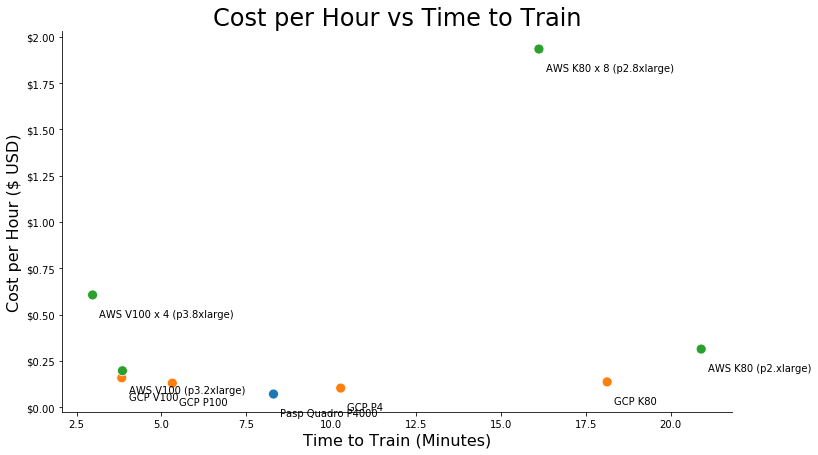

In [34]:
fig, ax = plt.subplots()

sns.scatterplot(
    data=df,
    x="Wall Time",
    y="Cost to Train",
    hue="Cloud", 
    legend=False,
    s=100,
)

for item_num in range(0,df.shape[0]):
     ax.text(
         df['Wall Time'][item_num]+0.2, 
         df['Cost to Train'][item_num]-0.12, 
         df['GPU'][item_num], 
     )

sns.despine()
fig.set_size_inches(12, 7)

ax.set_title('Cost per Hour vs Time to Train', fontsize=24)
# ax.legend(loc='upper right', fontsize=16,)
ax.set_xlabel('Time to Train (Minutes)',fontsize=16);
ax.set_ylabel('Cost per Hour ($ USD)',fontsize=16);

import matplotlib.ticker as mtick
fmt = '${x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 


# https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels

fig.savefig('cost_v_time.png')

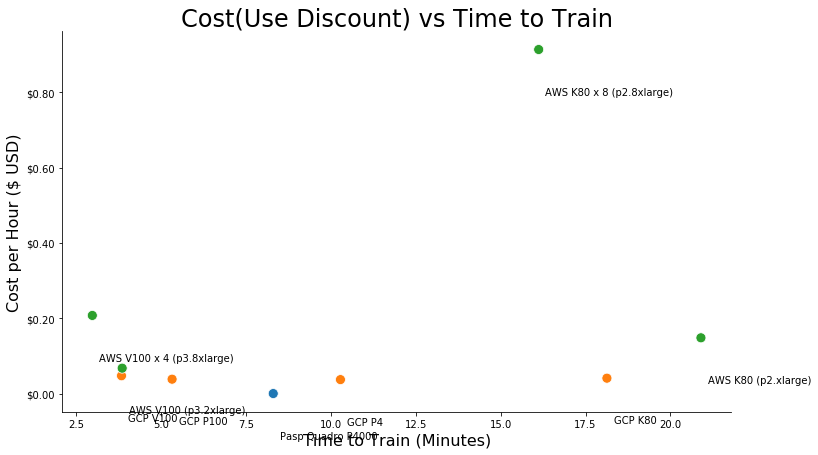

In [33]:
fig, ax = plt.subplots()

sns.scatterplot(
    data=df_disc,
    x="Wall Time",
    y="Use Discount Cost to Train",
    hue="Cloud", 
    legend=False,
    s=100,
)

for item_num in range(0,df.shape[0]):
     ax.text(
         df['Wall Time'][item_num]+0.2, 
         df['Use Discount Cost to Train'][item_num]-0.12, 
         df['GPU'][item_num], 
     )

sns.despine()
fig.set_size_inches(12, 7)

ax.set_title('Cost(Use Discount) vs Time to Train', fontsize=24)
# ax.legend(loc='upper right', fontsize=16,)
ax.set_xlabel('Time to Train (Minutes)',fontsize=16);
ax.set_ylabel('Cost per Hour ($ USD)',fontsize=16);

import matplotlib.ticker as mtick
fmt = '${x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 


# https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels

fig.savefig('cost_v_time.png')